## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

Questions from the lecture: Data Types
* Structured data is data that is very exact and precise. An example could be a student writing their name and their student ID right next to each other on a peice of paper. 
* Unstructured data is data that is almost scattered around with no clear connection. An example could be different percentages on a graph.
* Semi-structured data is a combination of both structured and unstructured data. An example could be a student ID number and all of the emails they've sent.

Questions from the lecture: Types of Variables
* Numerical data is any type of data that in number form. An example of continuous numerical data is volume. An example of discrete numerical data is the amount of days in a month.
* Categorical data is any and all data that isn't in numerical form. An example of ordinal categorical data are t-shirt sizes. An example of nominal categorical data are cake flavors.

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [25]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

In [27]:
show(DF)

### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [181]:
# Number of Rows - Observations
print(len(DF))

10000


In [183]:
# Number of Columns - Variables
print(len(DF.columns))

8


### Reduce the number of variables

In [185]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

1) Each column from the data above tells me the loan amount, interest rate, term, grade, state, annual income, homeownership, and debt to income. The units are measured by money.
2) The majority of the data is numerical, with the exception of the grade, state, and homeownership variables. The term variable is discrete while the loan amount, interest rate, annual income, and debt to income is continuous.
3) The grade state, and homeownership variables are categorical. The state and homeownership variables are nominal while the state variable is ordinal.

### Here is Example Code for a simple Histogram

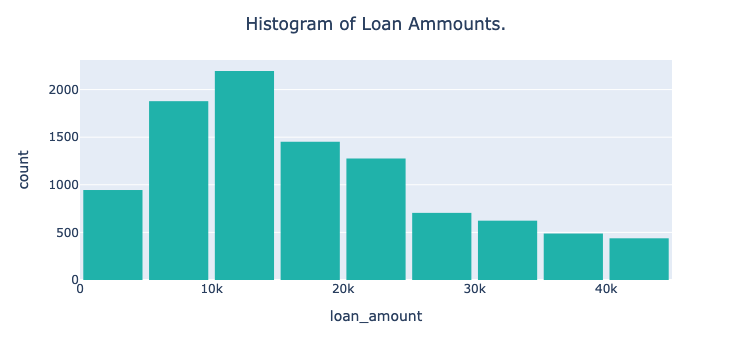

In [199]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


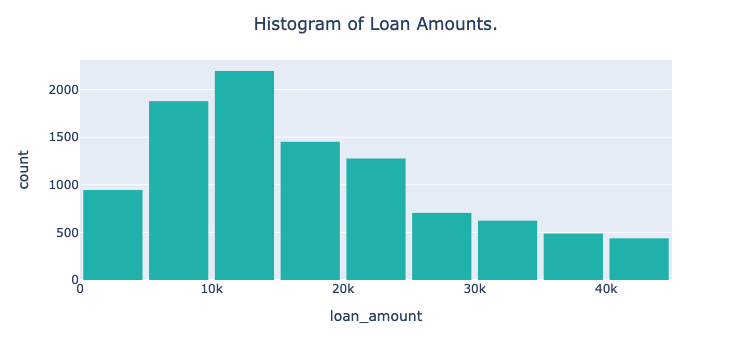

In [44]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=15,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Amounts.',
                  title_x=0.5)
fig.show()

When I changed the number of nbins I noticed a view patterns. Firstly, I noticed that the smaller the number the less bins were displayed because the width was larger and vice-versa. Also, I noticed that something "bad" was that the graph started losing it's clear curve when more nbins were added (smaller width).

In [49]:
# First get the range!
max_val = max(DF['loan_amount'])
min_val = min(DF['loan_amount'])
data_range = max_val - min_val

# Say we know the width we want
number_of_bins = 15
# Calculate the bin width
bin_width = data_range/number_of_bins
print(bin_width)

2600.0


**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


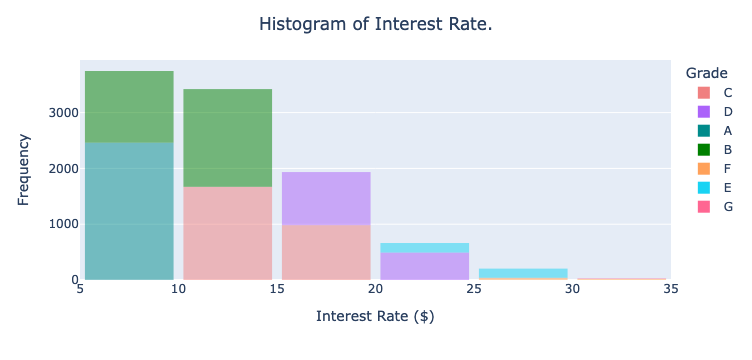

In [203]:
# Your code here
# With different colors
fig = px.histogram(DF,
                   nbins=9,
                   x='interest_rate',
                   color='grade',
                   opacity=0.5,
                   color_discrete_map={'A': 'darkcyan', 
                                       'B': 'green', 
                                       'C': 'lightcoral',
                                       })

fig.update_layout(bargap=0.1,
                  title='Histogram of Interest Rate.',
                  title_x=0.5,
                  xaxis_title="Interest Rate ($)",
                  yaxis_title="Frequency",
                  legend_title="Grade")
fig.show()

A few things that I learned from creating my graph were how to add both numerical and categorical data and how to change the color of specifc data. However, regarding the actual data, I learned the different grades that accumulate with interest rate.

### Here is example code for a histogram with a box plot included.

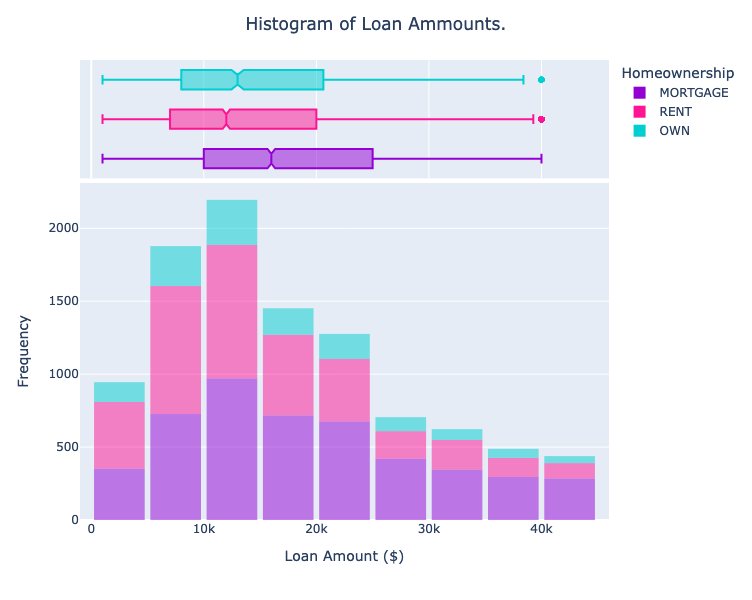

In [80]:
fig = px.histogram(DF,
                   nbins=15,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="box"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

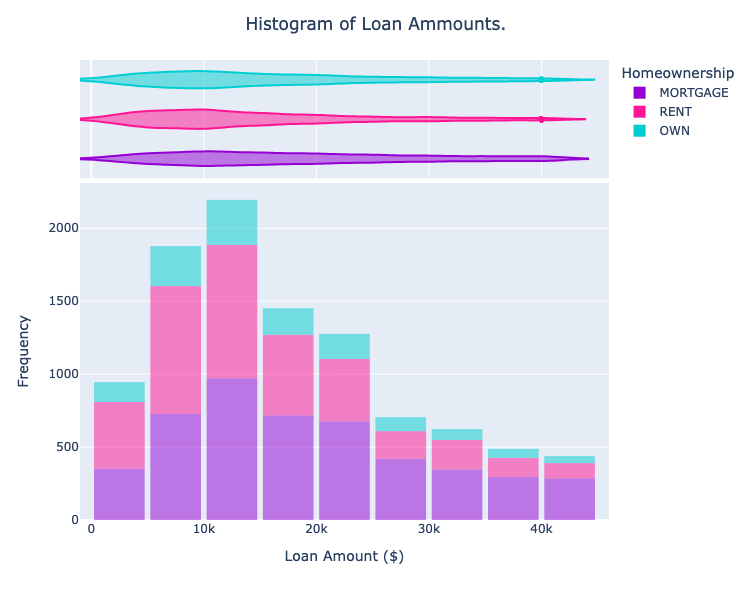

In [82]:
fig = px.histogram(DF,
                   nbins=15,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

When I changed the plot from marginal="box" to marginal="violin" I noticed that the 'box and whiskers' plot is replaced by lines that resemble strings. Most importantly, I noticed that when the marginal equals violin I can track the x-value throughout the "string", which isn't an option when the marginal equals box.

In [86]:
counts = DF['homeownership'].value_counts()
show(counts)

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [25]:
## Your code here


### Here is example code for a bar plot

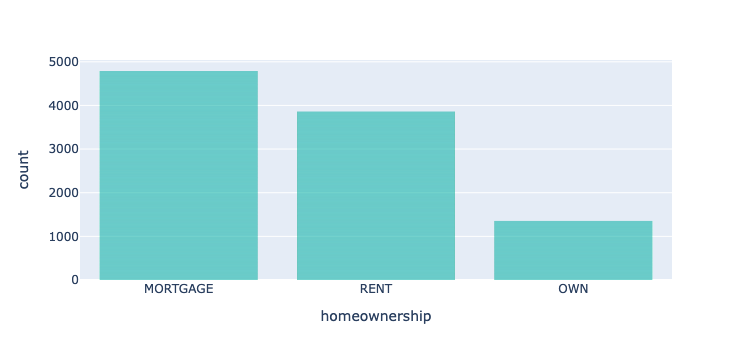

In [92]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

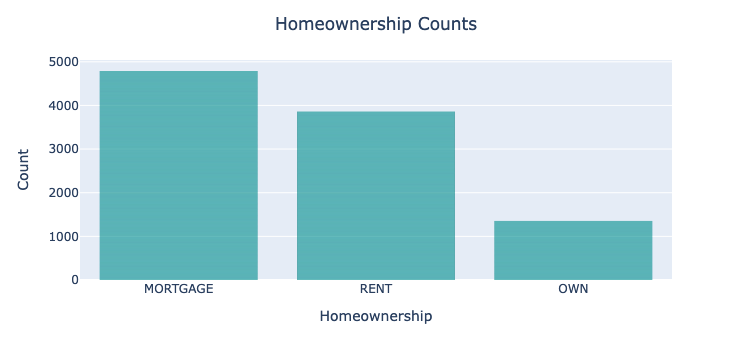

In [102]:
# Your code here
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['darkcyan'])
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(title='Homeownership Counts',
                  title_x=0.5,
                  xaxis_title="Homeownership",
                  yaxis_title="Count",
                  autosize=False,)

fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

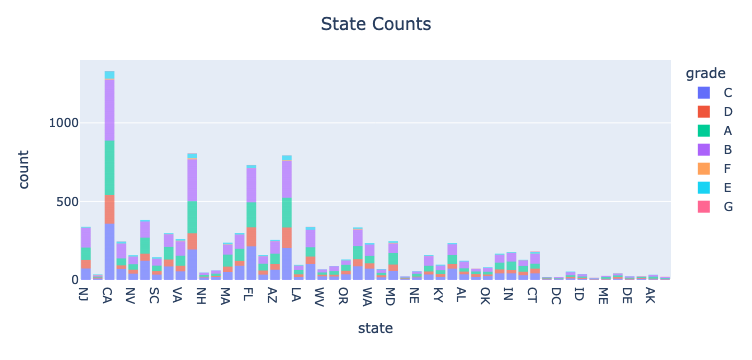

In [136]:
# Your code here
fig = px.bar(DF,
            x='state',
            color='grade')
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='State Counts',
                  title_x=0.5,
                  xaxis_title="state",
                  yaxis_title="count",
                  autosize=False,)
fig.show()

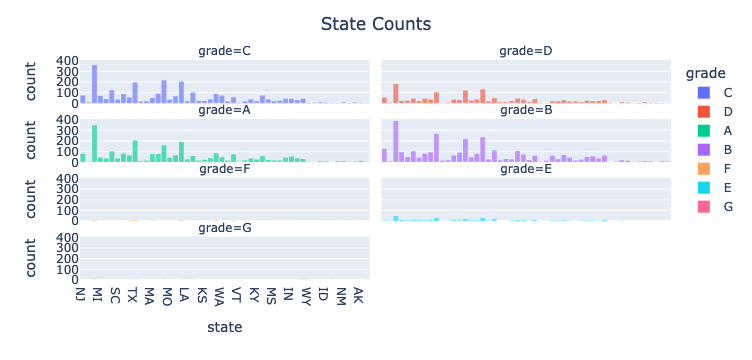

In [232]:
fig = px.bar(DF,
            x='state',
             facet_col='grade',
             facet_col_wrap=2,
            color='grade')
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='State Counts',
                  title_x=0.5,
                  xaxis_title="state",
                  yaxis_title="count",
                  autosize=False,)
fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [173]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)

In [191]:
print(len(DF_new))

60


In [193]:
print(len(DF_new.columns))

9


In [197]:
my_variables = ['weight',
                'wtdesire',
                'age','gender']

DF_new = DF_new[my_variables]

show(DF_new)

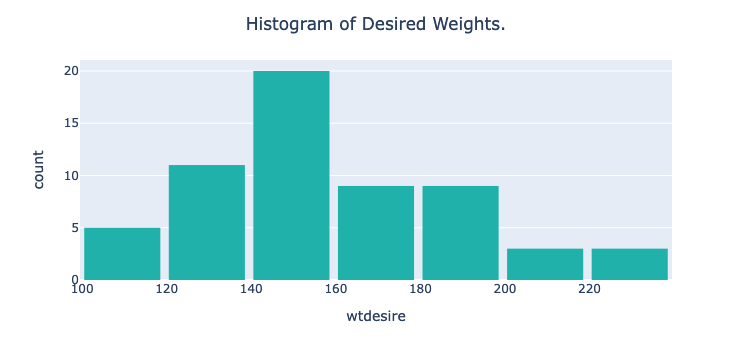

In [207]:
fig = px.histogram(DF_new,
                   x='wtdesire',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Desired Weights.',
                  title_x=0.5)
fig.show()

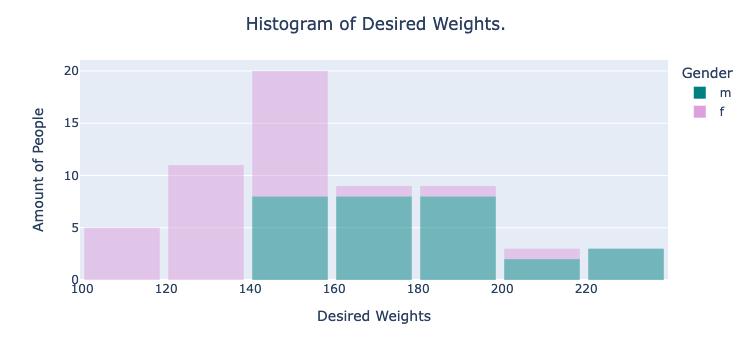

In [234]:
fig = px.histogram(DF_new,
                   x='wtdesire',
                   color='gender',
                   opacity=0.5,
                   color_discrete_map={'m': 'teal', 
                                       'f': 'plum'})

fig.update_layout(bargap=0.1,
                  title='Histogram of Desired Weights.',
                  title_x=0.5,
                  xaxis_title="Desired Weights",
                  yaxis_title="Amount of People",
                  legend_title="Gender")
fig.show()

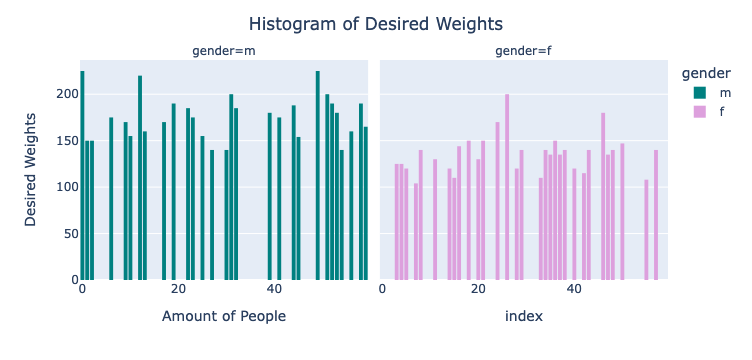

In [238]:
fig = px.bar(DF_new,
            y='wtdesire',
             facet_col='gender',
             facet_col_wrap=2,
            color='gender',
            color_discrete_map={'m': 'teal', 
                                       'f': 'plum'})
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='Histogram of Desired Weights',
                  title_x=0.5,
                  yaxis_title="Desired Weights",
                  xaxis_title="Amount of People",
                  autosize=False,)
fig.show()